# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

## Part (a)

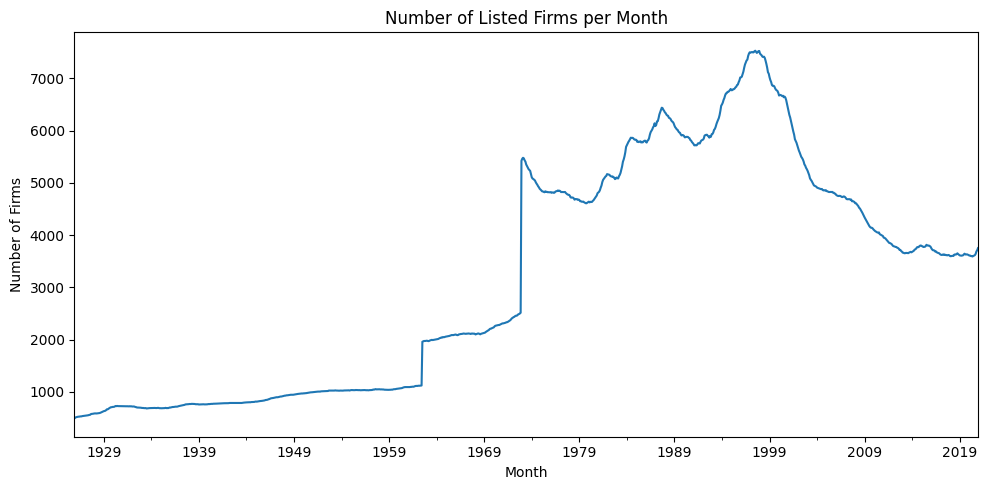

In [3]:
# Load your data
df = pd.read_csv("crsp_1926_2020.csv")

# Ensure column names are lowercase for easier handling
df.columns = df.columns.str.lower()

# Step 1: Filter for ordinary/common shares (shrcd = 10 or 11)
df = df[df['shrcd'].isin([10, 11])]

# Step 2: Filter for stocks listed on NYSE, AMEX, or NASDAQ (exchcd = 1, 2, 3)
df = df[df['exchcd'].isin([1, 2, 3])]

# Step 3: Set negative prices (prc < 0) to NA
df.loc[df['prc'] < 0, 'prc'] = pd.NA

# Step 4: Convert date to datetime and extract month
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')

# Step 5: Count number of unique permnos per month
monthly_firm_counts = df.groupby('month')['permno'].nunique()

# Plot
monthly_firm_counts.plot(title="Number of Listed Firms per Month", figsize=(10, 5))
plt.xlabel("Month")
plt.ylabel("Number of Firms")
plt.tight_layout()
plt.show()
